FWHM в кГц: 2.568992516219616
FWHM в кГц: 3.018726232171059
FWHM в кГц: 0.0
FWHM в кГц: 0.0
FWHM в кГц: 0.0


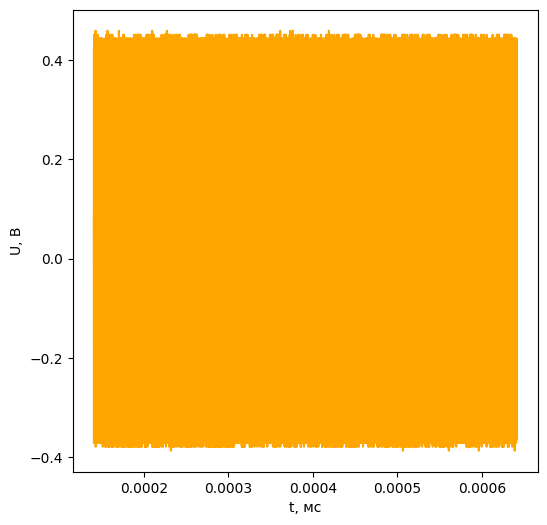

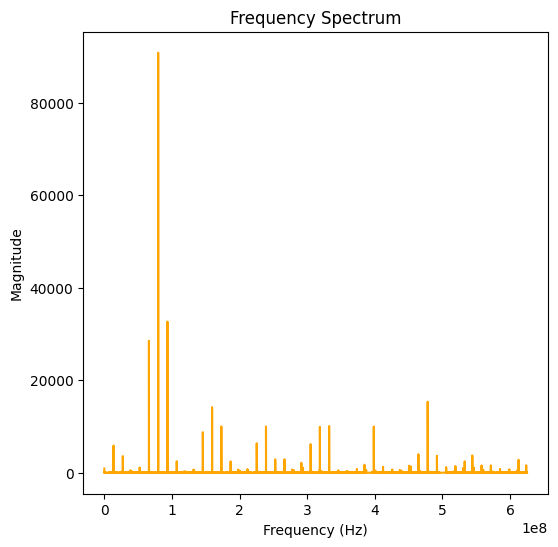

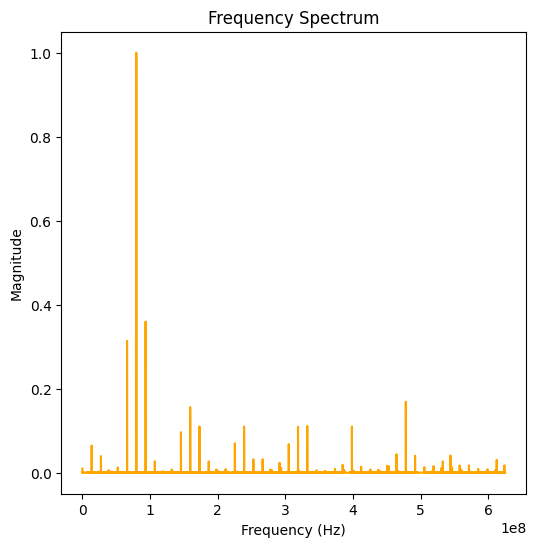

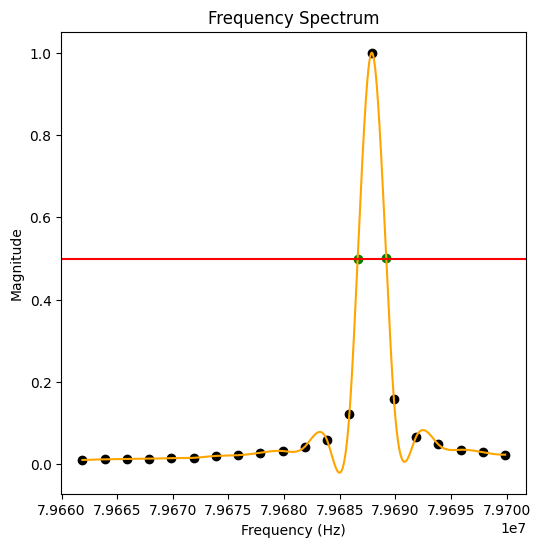

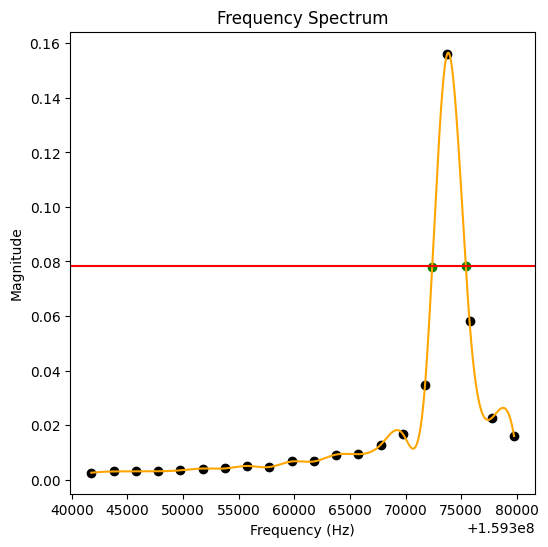

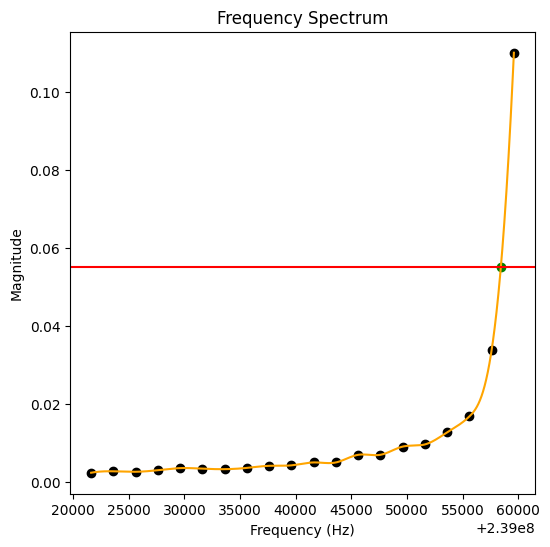

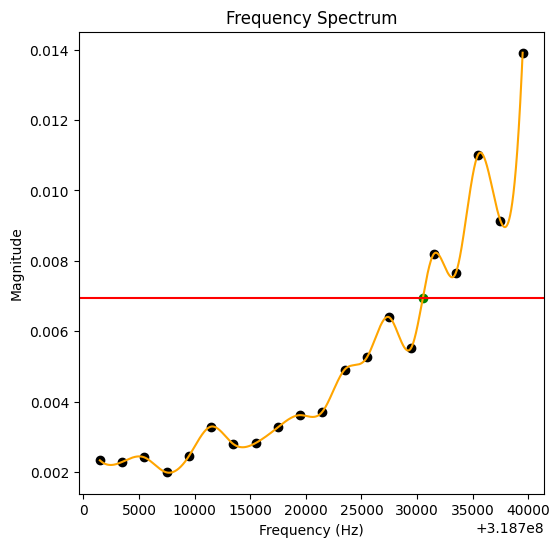

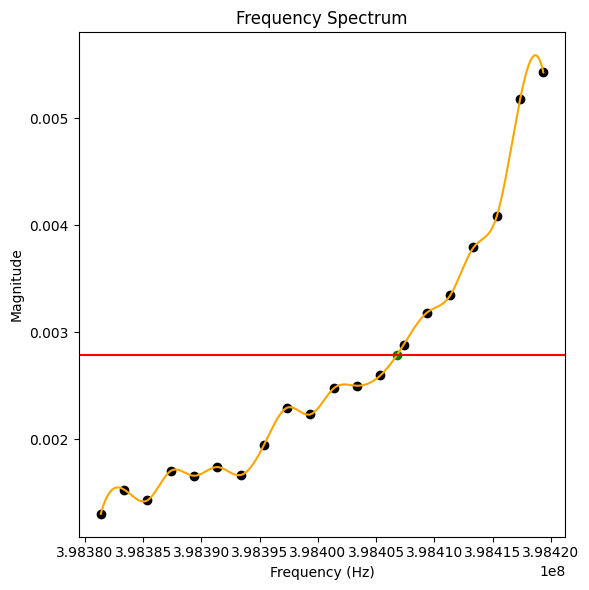

In [11]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from shapely.geometry import LineString
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import root_scalar

#%matplotlib qt 

df = pd.read_csv('50mks1mSA0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]

#sigma = 1.0
#filtered_signal = gaussian_filter1d(fft_signal, sigma)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

#filtered_signal = savgol_filter(abs(fft_signal), window_length = 4, polyorder = 3)
#filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

filtered_signal = fft_signal
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

freq_1 = []
fft_signal_1 = []
for i in range(len(freq)):
    if (freq[i]>79.66e6) and (freq[i]<79.7e6):
        freq_1.append(freq[i])
        fft_signal_1.append(abs(filtered_signal_norm[i]))
freq_2 = []
fft_signal_2 = []
for i in range(len(freq)):
    if (freq[i]>159.34e6) and (freq[i]<159.38e6):
        freq_2.append(freq[i])
        fft_signal_2.append(abs(filtered_signal_norm[i]))       
freq_3 = []
fft_signal_3 = []
for i in range(len(freq)):
    if (freq[i]>239.02e6) and (freq[i]<239.06e6):
        freq_3.append(freq[i])
        fft_signal_3.append(abs(filtered_signal_norm[i]))       
freq_4 = []
fft_signal_4 = []
for i in range(len(freq)):
    if (freq[i]>318.70e6) and (freq[i]<318.74e6):
        freq_4.append(freq[i])
        fft_signal_4.append(abs(filtered_signal_norm[i]))    
freq_5 = []
fft_signal_5 = []
for i in range(len(freq)):
    if (freq[i]>398.38e6) and (freq[i]<398.42e6):
        freq_5.append(freq[i])
        fft_signal_5.append(abs(filtered_signal_norm[i]))
        
spl_1 = interp1d(np.array(freq_1), np.array(fft_signal_1), kind='cubic')
#spectr_new_1 = np.array(freq_1)
spectr_new_1 = np.linspace(freq_1[0], freq_1[-1], 10000)
Spectr_spl_1 = spl_1(spectr_new_1)

spl_2 = interp1d(np.array(freq_2), np.array(fft_signal_2), kind='cubic')
spectr_new_2 = np.linspace(freq_2[0], freq_2[-1], 10000)
Spectr_spl_2 = spl_2(spectr_new_2)

spl_3 = interp1d(np.array(freq_3), np.array(fft_signal_3), kind='cubic')
spectr_new_3 = np.linspace(freq_3[0], freq_3[-1], 10000)
Spectr_spl_3 = spl_3(spectr_new_3)

spl_4 = interp1d(np.array(freq_4), np.array(fft_signal_4), kind='cubic')
spectr_new_4 = np.linspace(freq_4[0], freq_4[-1], 10000)
Spectr_spl_4 = spl_4(spectr_new_4)

spl_5 = interp1d(np.array(freq_5), np.array(fft_signal_5), kind='cubic')
spectr_new_5 = np.linspace(freq_5[0], freq_5[-1], 10000)
Spectr_spl_5 = spl_5(spectr_new_5)

def difference(x):
    return spl_1(x) - max(Spectr_spl_1)/2
intersections_1 = []
crossings_1 = []
for i in range(len(spectr_new_1) - 1):
    a, b = spectr_new_1[i], spectr_new_1[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_1.append(sol.root)
        crossings_1.append((sol.root, Spectr_spl_1[i]))
print(f"FWHM в кГц: {(intersections_1[-1] - intersections_1[0])/1e3}")

def difference(x):
    return spl_2(x) - max(Spectr_spl_2)/2
intersections_2 = []
crossings_2 = []
for i in range(len(spectr_new_2) - 1):
    a, b = spectr_new_2[i], spectr_new_2[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_2.append(sol.root)
        crossings_2.append((sol.root, Spectr_spl_2[i]))
print(f"FWHM в кГц: {(intersections_2[-1] - intersections_2[0])/1e3}")

def difference(x):
    return spl_3(x) - max(Spectr_spl_3)/2
intersections_3 = []
crossings_3 = []
for i in range(len(spectr_new_3) - 1):
    a, b = spectr_new_3[i], spectr_new_3[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_3.append(sol.root)
        crossings_3.append((sol.root, Spectr_spl_3[i]))
print(f"FWHM в кГц: {(intersections_3[-1] - intersections_3[0])/1e3}")

def difference(x):
    return spl_4(x) - max(Spectr_spl_4)/2
intersections_4 = []
crossings_4 = []
for i in range(len(spectr_new_4) - 1):
    a, b = spectr_new_4[i], spectr_new_4[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_4.append(sol.root)
        crossings_4.append((sol.root, Spectr_spl_4[i]))
print(f"FWHM в кГц: {(intersections_4[-1] - intersections_4[0])/1e3}")

def difference(x):
    return spl_5(x) - max(Spectr_spl_5)/2
intersections_5 = []
crossings_5 = []
for i in range(len(spectr_new_5) - 1):
    a, b = spectr_new_5[i], spectr_new_5[i + 1]
    if difference(a) * difference(b) < 0:  # Проверка смены знака
        sol = root_scalar(difference, bracket=[a, b], method='brentq')
        intersections_5.append(sol.root)
        crossings_5.append((sol.root, Spectr_spl_5[i]))
print(f"FWHM в кГц: {(intersections_5[-1] - intersections_5[0])/1e3}")

#fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(15, 15))
plt.figure(figsize=(6,6))
plt.plot(spectr1, Spectr1, color='orange')
plt.xlabel('t, мс')
plt.ylabel('U, В')

plt.figure(figsize=(6,6))
plt.plot(freq, np.abs(filtered_signal), color='orange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
plt.plot(freq, filtered_signal_norm, color='orange')
#ax[2].set_xlim(155e6, 165e6)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(155e6, 165e6)  
plt.plot(spectr_new_1, Spectr_spl_1, color='orange')
plt.axhline(y = max(Spectr_spl_1)/2, color = 'red')
plt.scatter(freq_1,fft_signal_1, color = 'k')
plt.scatter([c[0] for c in crossings_1], [c[1] for c in crossings_1], color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_2, Spectr_spl_2, color='orange')
plt.axhline(y = max(Spectr_spl_2)/2, color = 'red')
plt.scatter([c[0] for c in crossings_2], [c[1] for c in crossings_2], color='green')
plt.scatter(freq_2,fft_signal_2, color = 'k')
#ax[4].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[4].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_3, Spectr_spl_3, color='orange')
plt.scatter([c[0] for c in crossings_3], [c[1] for c in crossings_3], color='green')
plt.scatter(freq_3,fft_signal_3, color = 'k')
plt.axhline(y = max(Spectr_spl_3)/2, color = 'red')
#ax[5].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[5].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_4, Spectr_spl_4, color='orange')
plt.scatter([c[0] for c in crossings_4], [c[1] for c in crossings_4], color='green')
plt.scatter(freq_4,fft_signal_4, color = 'k')
plt.axhline(y = max(Spectr_spl_4)/2, color = 'red')
#ax[6].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[6].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.figure(figsize=(6,6))
plt.plot(spectr_new_5, Spectr_spl_5, color='orange')
plt.scatter([c[0] for c in crossings_5], [c[1] for c in crossings_5], color='green')
plt.scatter(freq_5,fft_signal_5, color = 'k')
plt.axhline(y = max(Spectr_spl_5)/2, color = 'red')
#ax[7].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[7].set_xlim(155e6, 165e6) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')

plt.tight_layout()
plt.show()

# Поиск пиков
#peaks, _ = find_peaks(abs(fft_signal))
# Определение максимального пика
#max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]
# Значение по оси x для максимального пика
#max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')

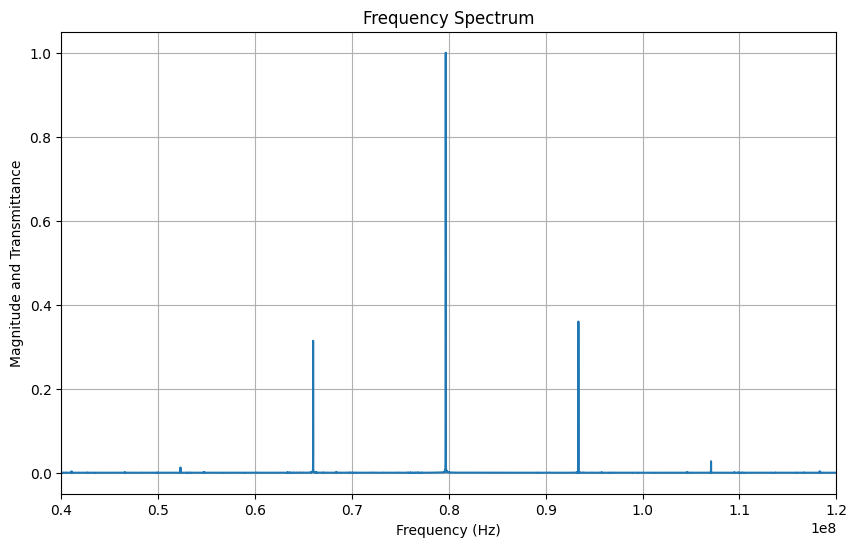

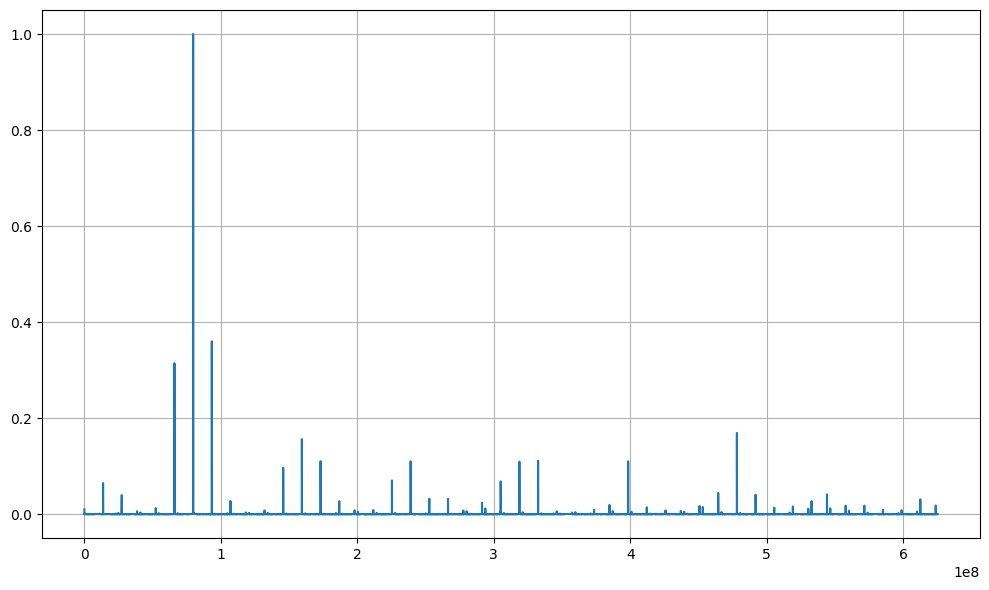

In [15]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('50mks1mSA0.csv')
#spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)

dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = np.abs(fft_signal)/max(abs(fft_signal))
'''peaks, _ = find_peaks(abs(fft_signal_norm)) # Поиск индексов всех пиков
max_peaks = []
for i in range(len(peaks)): # Поиск пиков из нужного диапазона
    if (freq[peaks[i]] > 0.65e8) and (freq[peaks[i]] < 0.95e8): 
        max_peaks.append((freq[peaks[i]], abs(fft_signal_norm[peaks[i]])))
max_peaks.pop(1) #Удаление пика присущего шуму
#Поиск межмодового расстояния
print("Расстояние между вторым и первым пиком",max_peaks[1][0] - max_peaks[0][0])
print("Расстояние между третьим и вторым пиком",max_peaks[2][0] - max_peaks[1][0])
print("Среднее межмодовое расстояние в МГц", round(max_peaks[1][0] - max_peaks[0][0] + max_peaks[2][0] - max_peaks[1][0])/2 * 1e-6)

#Поиск FWHM
half_max_amplitude_first_peak = max_peaks[0][1]/2 # max_peaks[i][j], i - номер номер строки, j - номер столбца
half_max_amplitude_second_peak = max_peaks[1][1]/2
half_max_amplitude_third_peak = max_peaks[2][1]/2
#print(half_max_amplitude_third_peak)
crossings = []
crossings_2 = []
crossings_3 = []
for i in range(len(freq)):
    if (freq[i] > 0.65e8) and (freq[i] < 0.73e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_first_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_first_peak) <= 0:
            crossings.append((freq[i], abs(fft_signal_norm[i])))
    if (freq[i] > 0.75e8) and (freq[i] < 0.85e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_second_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_second_peak) <= 0:
            crossings_2.append((freq[i], abs(fft_signal_norm[i])))
    if (freq[i] > 0.86e8) and (freq[i] < 0.98e8):
        if (abs(fft_signal_norm[i]) - half_max_amplitude_third_peak) * (abs(fft_signal_norm[i-1]) - half_max_amplitude_third_peak) <= 0:
            crossings_3.append((freq[i], abs(fft_signal_norm[i])))
    if i == len(freq)-1:
        fwhm = abs(crossings[1][0] - crossings[0][0])
        print(f"FWHM в МГЦ для первого пика: {fwhm/1e6:.0f}")
    if i == len(freq)-1:
        fwhm = abs(crossings_2[1][0] - crossings_2[0][0])
        print(f"FWHM в МГЦ для второго пика: {fwhm/1e6:.0f}")
    if i == len(freq)-1:
        fwhm = abs(crossings_3[1][0] - crossings_3[0][0])
        print(f"FWHM в МГЦ для третьего пика: {fwhm/1e6:.0f}")'''

plt.figure(figsize = (10,6))
plt.plot(freq, np.abs(fft_signal_norm))
#plt.scatter( [c[0] for c in max_peaks],[c[1] for c in max_peaks], color='k')  # точки пересечения
plt.xlim(40e6, 120e6)  # отображение только положительных частот
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude and Transmittance')
plt.title('Frequency Spectrum')
plt.grid(True)

plt.figure(figsize = (10,6))
plt.plot(freq, np.abs(fft_signal_norm))
plt.grid(True)

plt.tight_layout()
plt.show()